In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import ast
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_ind = df[df['job_country'] == 'India'] #First filter according to your country
df_explode = df_ind.explode('job_skills') #Then make a row for different job skills
df_explode[['job_title_short', 'job_skills']]

,job_title_short,job_skills
16,Data Engineer,powershell
16,Data Engineer,python
16,Data Engineer,sql
16,Data Engineer,mysql
16,Data Engineer,sql server
...,...,...
785716,Software Engineer,c#
785716,Software Engineer,sql
785718,Business Analyst,None
785740,Software Engineer,aws


In [4]:
df_group = df_explode.groupby(['job_skills','job_title_short']).size() #Now group by
df_group = df_group.reset_index(name='skill_count') #name the new column
df_group.sort_values(by='skill_count', ascending=False, inplace=True) #sort the dataframe by skill count
df_group

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


In [5]:
df_titles = df_group['job_title_short'].unique().tolist() #Remove duplicate jobs and convert into list from object
df_titles = sorted(df_titles[:3])#Sort the titles and take upper 3
df_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

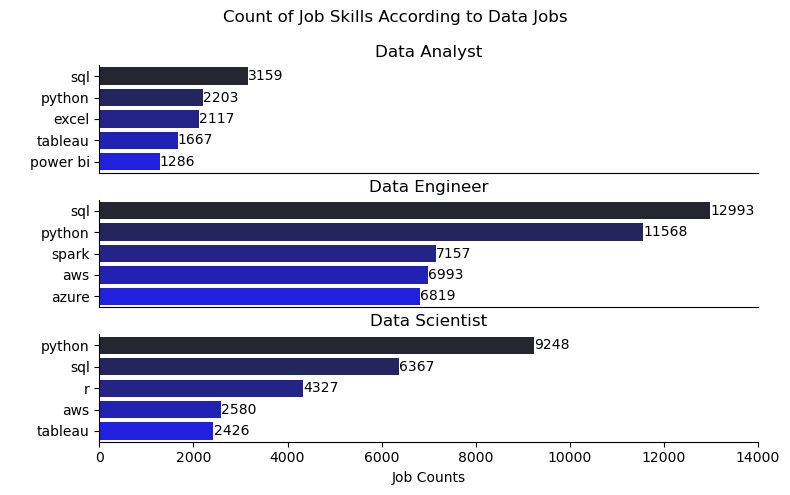

In [6]:
fig, ax = plt.subplots(len(df_titles), 1, figsize=(8, 5))

for x, job_title in enumerate(df_titles):#Make a for loop
    df_plot = df_group[df_group['job_title_short'] == job_title].head(5) #Define a new variable to filter the skills according to the job titles
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[x], hue='job_skills', palette='dark:b')#plot the graph
    ax[x].set_title(job_title)
    ax[x].set_xlabel('Job Counts')
    ax[x].set_ylabel(' ')
    ax[x].set_xlim(0, 14000)#make x axis values same for every data 
    for n, v in enumerate(df_plot['skill_count']): #to put the count infront of bars use a for loop
        ax[x].text(v+1,n, str(v), va='center')
    if x != 2:
        ax[x].set_xticks([])
    if x != 2:
        ax[x].set_xlabel('')

fig.suptitle('Count of Job Skills According to Data Jobs')
fig.tight_layout(h_pad=0.5)
sns.despine()
plt.show()